In [1]:
from models.load_premade import load_premade_model
from tensorflow import keras
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255

print(x_train.shape)

(60000, 28, 28, 1)


In [2]:
input_shape = x_train.shape[1:]
latent_dim = 2

model = load_premade_model(model_type = "autoencoder", model_name = "dense", 
                           input_shape=input_shape, 
                           latent_dim=latent_dim)

In [3]:
output = model(x_test)

In [4]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy)

epochs = 10
batch_size = 32
history = model.fit(x_train, x_train, validation_data=(x_test, x_test), 
                    epochs=epochs, batch_size=batch_size)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2288 - val_loss: 0.2077
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2041 - val_loss: 0.2012
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1995 - val_loss: 0.1981
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1969 - val_loss: 0.1961
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1949 - val_loss: 0.1941
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1931 - val_loss: 0.1928
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1914 - val_loss: 0.1909
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1899 - val_loss: 0.1894
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1886 - val_loss: 0.1892
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.187

In [6]:
import importlib
import visual.plot_utils
importlib.reload(visual.plot_utils)
from visual.plot_utils import plot_mnist_comparison, plot_2d_scatter

original = x_test[20:30, :, :, :]
decoded = model(original)

plot_mnist_comparison((original, decoded), figsize=(28, 5), row_labels=['Original', 'Reconstructed'])

AttributeError: module 'visual' has no attribute 'plot_utils'

tf.Tensor(
[[   6.333533    52.233223 ]
 [  -1.0620375   -0.3066151]
 [-109.439835   119.86361  ]
 ...
 [   1.0048857   18.257912 ]
 [  -5.6019278    7.137657 ]
 [ -11.439255    -2.8184617]], shape=(10000, 2), dtype=float32)


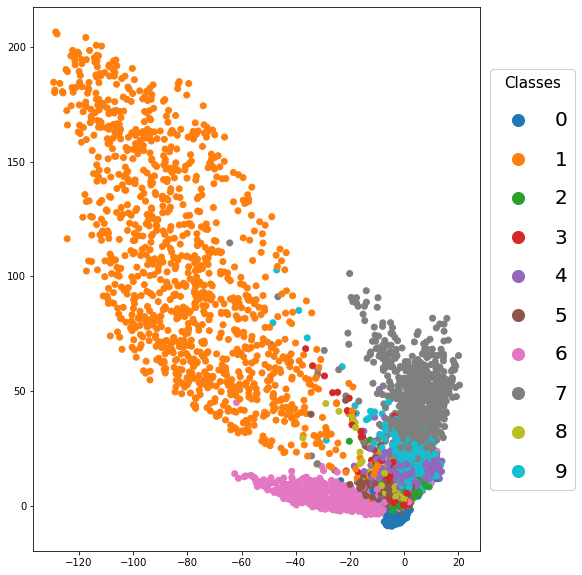

In [ ]:
import matplotlib.pyplot as plt
encoded = model.encode(x_test)
print(encoded)

a = plot_2d_scatter(encoded, y_test)

(10, 2)
[[ -1.54746972  23.16127804]
 [-34.14240829  54.80591834]
 [-49.02679011   2.7431321 ]
 [-29.2229793   82.30277422]
 [  5.90447363  17.95619723]
 [ 38.43876697 -30.59448613]
 [ 18.88736165  -7.18424676]
 [-20.43623399  19.32924071]
 [-56.67358139 110.47002931]
 [-25.20677714  16.53774938]]


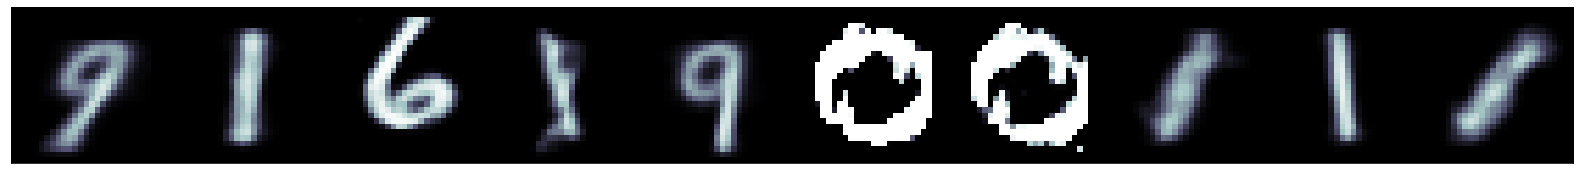

In [ ]:
# random points

encoded_mean = np.mean(encoded, axis=0)
encoded_cov = np.cov(encoded.numpy().T)

random_points = np.random.multivariate_normal(encoded_mean, encoded_cov, size=10)
print(np.shape(random_points))
print(random_points)

decoded_random = model.decoder(random_points)

plot_mnist_comparison((decoded_random,), figsize=(28, 5))

(10000, 2)
(10, 2)
tf.Tensor([ 7  2  1 ... 11 11 11], shape=(10010,), dtype=uint8)


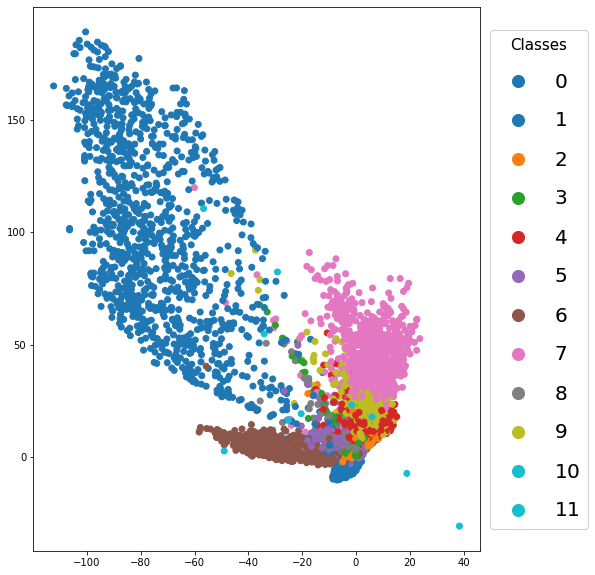

In [ ]:
# plot test set and randomly sampled
print(encoded.shape)
print(random_points.shape)

encoded_and_random = tf.concat([encoded, random_points], 0)

random_labels = 11*np.ones(len(random_points))
encoded_and_random_labels = tf.concat([y_test, random_labels], 0)
print(encoded_and_random_labels)

plot_2d_scatter(encoded_and_random.numpy(), encoded_and_random_labels.numpy())

In [ ]:
images = model(x_test)
from visual.sample_scatter_gui import SampleScatterGUI
%matplotlib

print(images.shape)
print(y_test.shape)


gui = SampleScatterGUI(encoded.numpy(), y_test, images[:,:,:,0])

Using matplotlib backend: Qt5Agg
(10000, 28, 28, 1)
(10000,)


Traceback (most recent call last):
  File "C:\Users\Lukas\Anaconda3\envs\JL-ML\lib\site-packages\matplotlib\cbook\__init__.py", line 224, in process
    func(*args, **kwargs)
  File "c:\Users\Lukas\Desktop\VSCode Project\JL-ML\JL-ML\src\visual\sample_scatter_gui.py", line 66, in button_press_callback
    self.current_index = self.get_closest_index(x)
  File "c:\Users\Lukas\Desktop\VSCode Project\JL-ML\JL-ML\src\visual\sample_scatter_gui.py", line 88, in get_closest_index
    d = np.sum(np.power(self.latent_projection-x,2),1)
TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'
